In [2]:
from IPython import get_ipython
get_ipython().run_line_magic('reload_ext', 'autoreload')
get_ipython().run_line_magic('autoreload', '2')
get_ipython().run_line_magic('matplotlib', 'inline')

In [5]:
import pathlib
import zipfile
import IPython
import random
import shutil
import os
from src.config import *

ZIP_PATH = DATA_DIR / 'frog-dataset-master.zip'

https://github.com/jonshamir/frog-dataset contains >7k images of frogs on a white background. We can download just the folder of processed 224x224 images ~~using DownGit~~ 

~~https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/jonshamir/frog-dataset/tree/master/data-224~~

*Github only lists the first 1000 files in a folder and DownGit does not account for this* as the dataset isn't that big, we will simply download the entire repo and remove what we don't need.

In [4]:
# unzip folder into data/raw
with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
    zip_ref.extractall(DATA_DIR / 'raw')

In [18]:
# in python 3.8, shutil.move will not accept pathlike objects
source_dir = (DATA_DIR / "raw" / "frog-dataset-master" / "data-224").__str__()
target_dir = (DATA_DIR / "raw" / "data-224").__str__()

# make a folder to put the files
if not os.path.exists(target_dir):
    os.mkdir(DATA_DIR / "raw" / "data-224")

file_names = os.listdir(source_dir)


for file_name in file_names:
    shutil.move(os.path.join(source_dir, file_name), target_dir)

In [21]:
# remove unwanted files
shutil.rmtree(DATA_DIR / "raw" / "frog-dataset-master")
os.remove(ZIP_PATH)

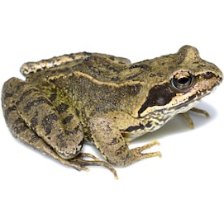

In [30]:
filepaths = [x for x in DATA_DIR.glob('raw/data-224/*.png')]

IPython.display.Image(filename=random.choice(filepaths))